In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Read the data about coffee prices

In [2]:
data_prices  = pd.read_csv('full_data.csv')

In [3]:
data_prices.head()

,date,composite_ind,columbian_milds,other_milds,brazilian_nat,robustas
0,2017-08-01,130.82,158.74,153.49,136.18,104.83
1,2017-08-02,133.23,162.06,156.95,139.18,105.86
2,2017-08-03,133.11,161.91,156.81,139.15,105.69
3,2017-08-04,133.05,161.81,156.85,138.97,105.67
4,2017-08-07,134.72,163.77,158.87,141.04,106.73


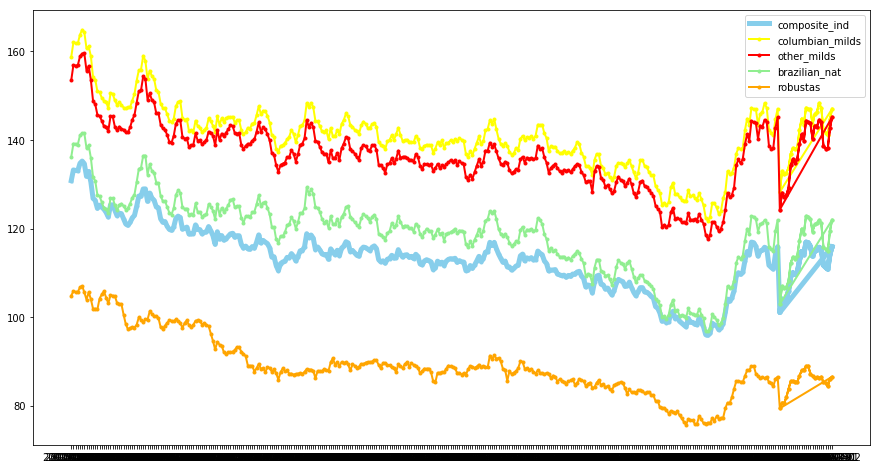

In [12]:
plt.figure(figsize=(15, 8))
plt.plot('date', 'composite_ind', data=data_prices, marker='o', markerfacecolor='skyblue', markersize=3, color='skyblue', linewidth=5)
plt.plot('date', 'columbian_milds', data=data_prices, marker='o', markerfacecolor='yellow', markersize=3, color='yellow', linewidth=2)
plt.plot('date', 'other_milds', data=data_prices, marker='o', markerfacecolor='red', markersize=3, color='red', linewidth=2)
plt.plot('date', 'brazilian_nat', data=data_prices, marker='o', markerfacecolor='lightgreen', markersize=3, color='lightgreen', linewidth=2)
plt.plot('date', 'robustas', data=data_prices, marker='o', markerfacecolor='orange', markersize=3, color='orange', linewidth=2)
plt.legend()

In [5]:
data_trends = pd.read_csv('trends.csv')

In [6]:
data_trends.head()

,date,coffee beans
0,2017-08-02,91
1,2017-08-03,94
2,2017-08-04,94
3,2017-08-05,92
4,2017-08-06,100


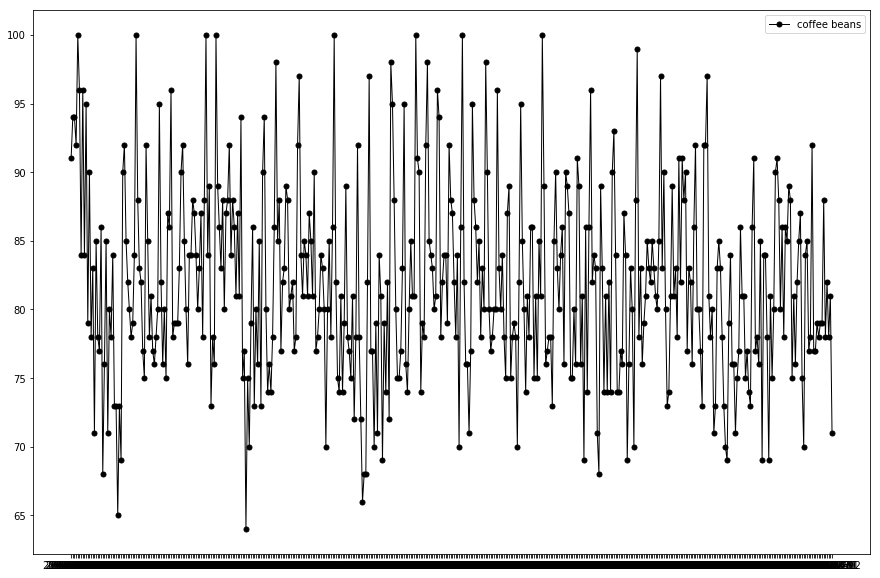

In [11]:
plt.figure(figsize=(15, 10))
plt.plot('date', 'coffee beans', data=data_trends, marker='o', markerfacecolor='black', markersize=5, color='black', linewidth=1)
plt.legend()

In [36]:
to_remove = [item for item in data_trends['date'] if item not in data_prices['date'].tolist()]

In [37]:
to_remove

['2017-08-05',
 '2017-08-06',
 '2017-08-12',
 '2017-08-13',
 '2017-08-19',
 '2017-08-20',
 '2017-08-26',
 '2017-08-27',
 '2017-09-02',
 '2017-09-03',
 '2017-09-09',
 '2017-09-10',
 '2017-09-16',
 '2017-09-17',
 '2017-09-23',
 '2017-09-24',
 '2017-09-30',
 '2017-10-01',
 '2017-10-07',
 '2017-10-08',
 '2017-10-14',
 '2017-10-15',
 '2017-10-21',
 '2017-10-22',
 '2017-10-28',
 '2017-10-29',
 '2017-11-04',
 '2017-11-05',
 '2017-11-11',
 '2017-11-12',
 '2017-11-18',
 '2017-11-19',
 '2017-11-25',
 '2017-11-26',
 '2017-12-02',
 '2017-12-03',
 '2017-12-09',
 '2017-12-10',
 '2017-12-16',
 '2017-12-17',
 '2017-12-23',
 '2017-12-24',
 '2017-12-25',
 '2017-12-30',
 '2017-12-31',
 '2018-01-01',
 '2018-01-06',
 '2018-01-07',
 '2018-01-13',
 '2018-01-14',
 '2018-01-20',
 '2018-01-21',
 '2018-01-27',
 '2018-01-28',
 '2018-02-03',
 '2018-02-04',
 '2018-02-10',
 '2018-02-11',
 '2018-02-17',
 '2018-02-18',
 '2018-02-24',
 '2018-02-25',
 '2018-03-03',
 '2018-03-04',
 '2018-03-10',
 '2018-03-11',
 '2018-03-

In [43]:
data_trends = data_trends[~(data_trends['date'].isin(to_remove))]

In [44]:
data_trends.head()

,date,coffee beans
0,2017-08-02,91
1,2017-08-03,94
2,2017-08-04,94
5,2017-08-07,96
6,2017-08-08,84


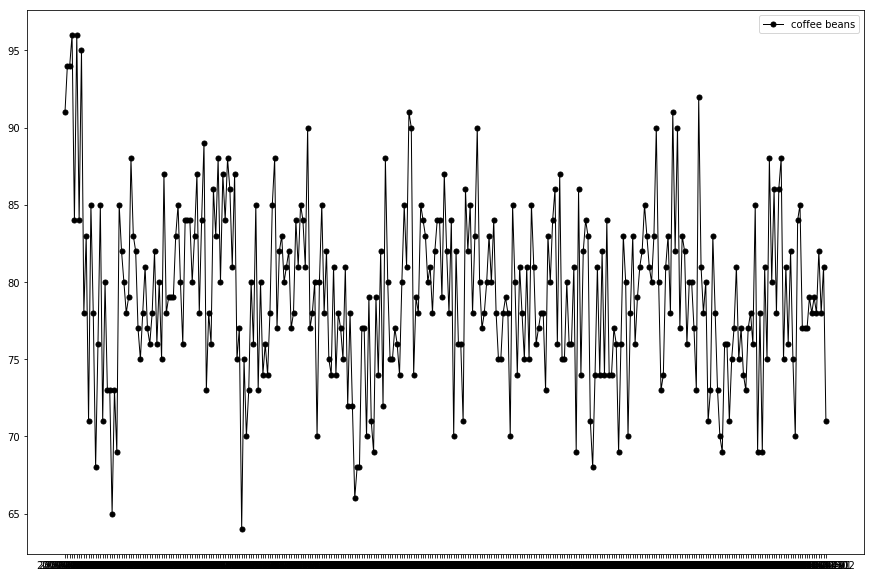

In [45]:
plt.figure(figsize=(15, 10))
plt.plot('date', 'coffee beans', data=data_trends, marker='o', markerfacecolor='black', markersize=5, color='black', linewidth=1)
plt.legend()

In [48]:
data = pd.merge(data_prices, data_trends, on="date", how="left").drop(data.index[0])

In [49]:
data.head()

,date,composite_ind,columbian_milds,other_milds,brazilian_nat,robustas,coffee beans
1,2017-08-02,133.23,162.06,156.95,139.18,105.86,91.0
2,2017-08-03,133.11,161.91,156.81,139.15,105.69,94.0
3,2017-08-04,133.05,161.81,156.85,138.97,105.67,94.0
4,2017-08-07,134.72,163.77,158.87,141.04,106.73,96.0
5,2017-08-08,135.23,164.91,159.52,141.52,107.02,84.0


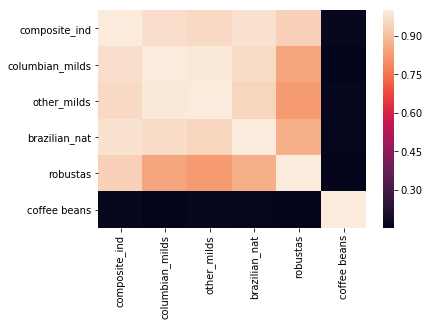

In [56]:
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [57]:
data["coffee beans"]

1      91.0
2      94.0
3      94.0
4      96.0
5      84.0
6      96.0
7      84.0
8      95.0
9      78.0
10     83.0
11     71.0
12     85.0
13     78.0
14     68.0
15     76.0
16     85.0
17     71.0
18     80.0
19     73.0
20     73.0
21     65.0
22     73.0
23     69.0
24     85.0
25     82.0
26     80.0
27     78.0
28     79.0
29     88.0
30     83.0
       ... 
345    78.0
346    82.0
347    78.0
348    81.0
349    71.0
350    88.0
351    80.0
352    86.0
353    78.0
354    86.0
355    88.0
356    75.0
357    81.0
358    76.0
359    82.0
360    75.0
361    70.0
362    84.0
363    85.0
364    77.0
365    77.0
366    77.0
367    79.0
368    78.0
369    79.0
370    78.0
371    82.0
372    78.0
373    81.0
374    71.0
Name: coffee beans, Length: 374, dtype: float64

In [63]:
data_site = pd.read_csv('20181110.export.CSV',  sep='\t', error_bad_lines=False, names={i for i in range(58)})

/home/ira/virtualenv/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [64]:
data_site.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57],
           dtype='int64')

In [87]:
sites = data_site[57]

In [113]:
sites[0]

'http://blog.camera.org/2008/12/'

In [92]:
sites = sites.drop_duplicates()

In [93]:
sites.to_csv("20181110.csv")

In [96]:
from urllib.parse import urlparse

In [103]:
uniq = sites.apply(lambda x: urlparse(x).netloc)

In [112]:
pd.Series(uniq).value_counts()[:80]

www.business-standard.com       209
www.dailymail.co.uk             172
www.wkrb13.com                  138
www.dailypolitical.com          132
www.thehindu.com                125
www.thenews.com.pk              125
www.yahoo.com                   124
www.independent.ie              121
timesofindia.indiatimes.com     112
indianexpress.com               111
www.sfgate.com                  106
www.cbc.ca                      102
www.nbcnews.com                  99
www.msn.com                      98
www.nyoooz.com                   81
blog.camera.org                  76
www.siasat.com                   73
www.thetimes.co.uk               72
www.washingtonpost.com           72
dailytimes.com.pk                69
www.irishtimes.com               66
www.dawn.com                     65
www.onenewspage.com              65
www.xinhuanet.com                65
sputniknews.com                  65
www.mirror.co.uk                 63
www.ghanaweb.com                 62
www.express.co.uk           